# XGBoost
In this notebook the XGBoost model will be implemented. We will use historical energy consumption data and meteorological data to make a prediction on future consumption values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

seed=99
random.seed(seed)
np.random.seed(seed)

In [2]:
morocco = pd.read_csv("../data/processed/morocco_processed.csv")
# Remove the last 18 observations as the Temperature values are missing.
#usa = usa[:-18]

In [5]:
morocco.set_index('DateTime', inplace=True)

## Preprocessing
Before starting the regression analysis and prediction modeling we will have to prepare the data, clean it and process it.

In [6]:
morocco.dtypes

Temperature              float64
Humidity                 float64
Wind Speed               float64
general diffuse flows    float64
diffuse flows            float64
Consumption              float64
year                       int64
month                      int64
day                        int64
hour                       int64
dtype: object

In [10]:
usa['DateTime'] = pd.to_datetime(usa['DateTime'])
#usa.set_index('DateTime', inplace=True)

In [19]:
usa['year'] = usa['DateTime'].dt.year
usa['month'] = usa['DateTime'].dt.month
usa['day'] = usa['DateTime'].dt.day
usa['hour'] = usa['DateTime'].dt.hour

usa = usa.drop(columns=['DateTime'])

## Split data into training and test sets

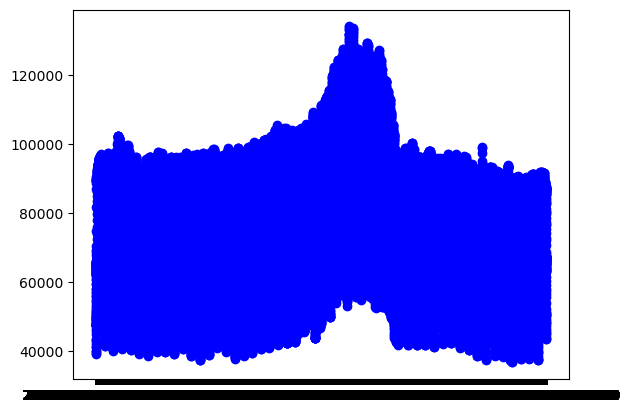

In [15]:
plt.plot(morocco.index, morocco['Consumption'], marker='o', linestyle='-', color='b')

In [21]:
# split_date: 

train = morocco[(morocco['year'] < 2008)]
test = morocco[(morocco['year'] >= 2008)]

X_train = train.drop(columns=['Consumption'])
y_train = train['Consumption']

X_test = test.drop(columns=['Consumption'])
y_test = test['Consumption']

## Regression analysis

In [22]:
X_train.dtypes

Temperature    float64
year             int32
month            int32
day              int32
hour             int32
dtype: object

In [23]:
X_train.shape

(35064, 5)

In [24]:
y_train.shape

(35064,)

In [25]:
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=seed)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=99, ...)

In [26]:
y_pred = model.predict(X_test)

## Evaluate model accuracy

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2}")

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Root Mean Squared Error (RMSE): 159964.08839745627
R-squared (R^2): 0.837619311046566
Mean Absolute Percentage Error (MAPE): 6.62369089971062%


XGBoost is recognised as the best overall model. In order to improve upon the results, try to set parameters such as n_estimators (default is 100, try with 1000), early_stopping (50) to avoid overfitting. Also try to add evaluation sets when fitting and setting verbose to True in order to see if the convergence actually reduces the eval metric. We can also try lowering the learning rate so the convergence goes slower.

### Feature importance

In [16]:
model.feature_importances_

NameError: name 'model' is not defined